###  **All required libraries**

In [49]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import yfinance as yf
import numpy as np
import tensorflow as tf

Define start day to fetch the dataset from the yahoo finance library

In [ ]:
# Define a function to load the dataset

START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Function to load the dataset
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    data.set_index("Date", inplace=True)  # Set 'Date' as index
    return data

In [3]:
# Load data

data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,,
2010-01-04 00:00:00+00:00,289.971313,375.825012,379.450012,374.524994,377.399994,1963682
2010-01-05 00:00:00+00:00,290.048462,375.924988,379.774994,373.274994,377.500000,2014488
2010-01-06 00:00:00+00:00,283.490234,367.424988,376.100006,366.500000,375.924988,3349176
2010-01-07 00:00:00+00:00,275.601013,357.200012,369.700012,355.500000,367.750000,6474892
2010-01-08 00:00:00+00:00,269.968719,349.899994,359.250000,348.250000,358.000000,6048178


In [4]:
df = df.drop(['Adj Close'], axis = 1)
df.head()

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2010-01-04 00:00:00+00:00,375.825012,379.450012,374.524994,377.399994,1963682
2010-01-05 00:00:00+00:00,375.924988,379.774994,373.274994,377.500000,2014488
2010-01-06 00:00:00+00:00,367.424988,376.100006,366.500000,375.924988,3349176
2010-01-07 00:00:00+00:00,357.200012,369.700012,355.500000,367.750000,6474892
2010-01-08 00:00:00+00:00,349.899994,359.250000,348.250000,358.000000,6048178


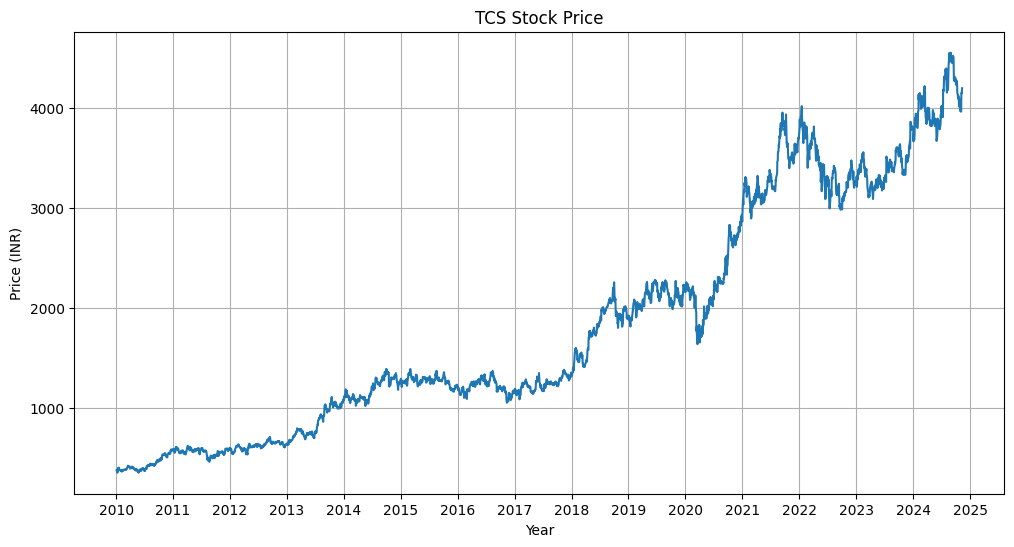

In [141]:
plt.figure(figsize=(12, 6))

# Plot the data for 'Close' prices
plt.plot(df.index, df['Close'])

# Set the title and labels
plt.title("TCS Stock Price")
plt.xlabel("Year")
plt.ylabel("Price (INR)")

# Set the x-axis to display years only
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Show grid and plot
plt.grid(True)
plt.show()

In [6]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2010-01-04 00:00:00+00:00,375.825012,379.450012,374.524994,377.399994,1963682
2010-01-05 00:00:00+00:00,375.924988,379.774994,373.274994,377.500000,2014488
2010-01-06 00:00:00+00:00,367.424988,376.100006,366.500000,375.924988,3349176
2010-01-07 00:00:00+00:00,357.200012,369.700012,355.500000,367.750000,6474892
2010-01-08 00:00:00+00:00,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
2024-11-05 00:00:00+00:00,3971.350098,3986.000000,3941.100098,3941.100098,967590
2024-11-06 00:00:00+00:00,4139.649902,4149.799805,3975.250000,4003.600098,3792017


In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
Date,
2010-01-04 00:00:00+00:00,NaN
2010-01-05 00:00:00+00:00,NaN
2010-01-06 00:00:00+00:00,NaN
2010-01-07 00:00:00+00:00,NaN
2010-01-08 00:00:00+00:00,NaN
...,...
2024-11-05 00:00:00+00:00,4212.488494
2024-11-06 00:00:00+00:00,4215.103494
2024-11-07 00:00:00+00:00,4218.291992


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

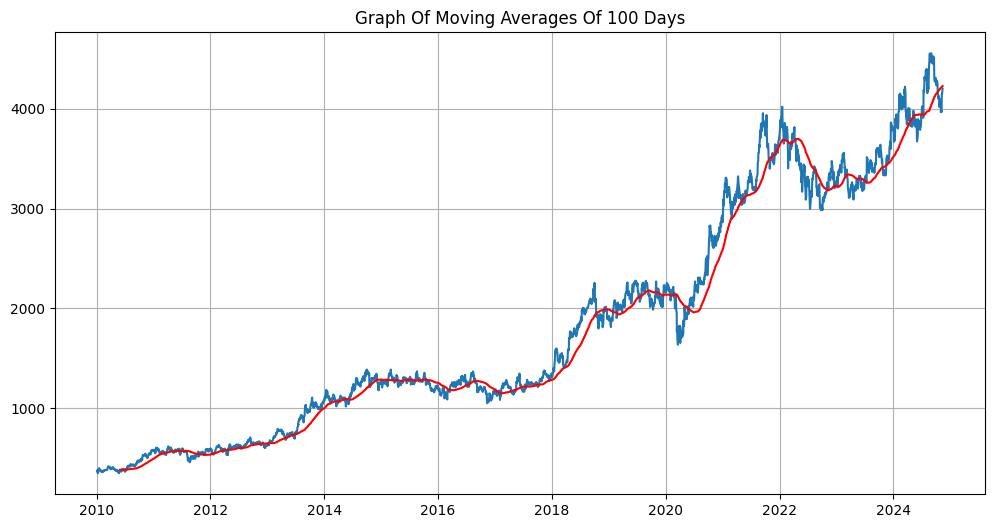

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
Date,
2010-01-04 00:00:00+00:00,NaN
2010-01-05 00:00:00+00:00,NaN
2010-01-06 00:00:00+00:00,NaN
2010-01-07 00:00:00+00:00,NaN
2010-01-08 00:00:00+00:00,NaN
...,...
2024-11-05 00:00:00+00:00,4077.753000
2024-11-06 00:00:00+00:00,4079.037250
2024-11-07 00:00:00+00:00,4080.272749


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

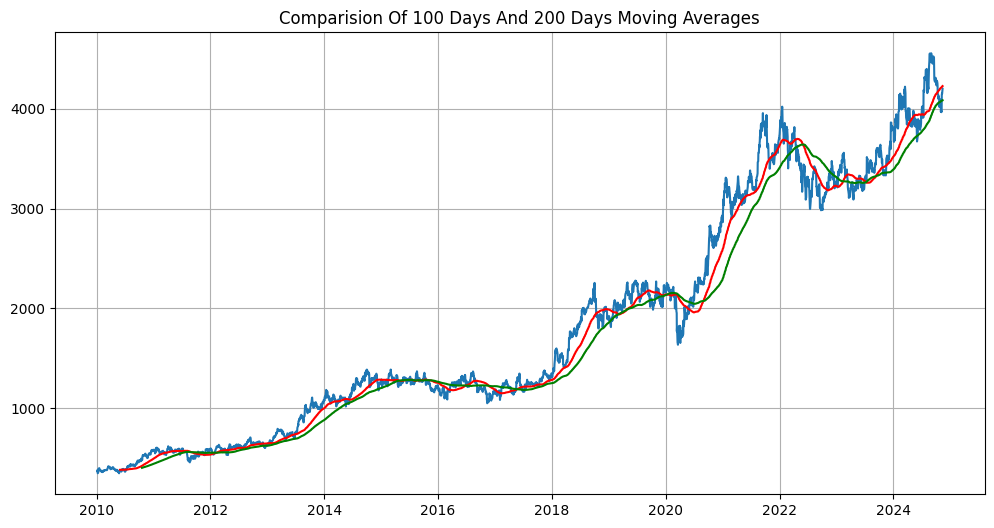

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [11]:
df.shape

(3667, 5)

In [12]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2566, 6)
(1101, 6)


In [13]:

train.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,,
2010-01-04 00:00:00+00:00,289.971313,375.825012,379.450012,374.524994,377.399994,1963682
2010-01-05 00:00:00+00:00,290.048462,375.924988,379.774994,373.274994,377.500000,2014488
2010-01-06 00:00:00+00:00,283.490234,367.424988,376.100006,366.500000,375.924988,3349176
2010-01-07 00:00:00+00:00,275.601013,357.200012,369.700012,355.500000,367.750000,6474892
2010-01-08 00:00:00+00:00,269.968719,349.899994,359.250000,348.250000,358.000000,6048178


In [14]:
test.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,,
2020-06-05 00:00:00+00:00,1923.867065,2048.250000,2098.0,2040.300049,2091.600098,3573289
2020-06-08 00:00:00+00:00,1945.939941,2071.750000,2095.0,2062.100098,2078.250000,2957841
2020-06-09 00:00:00+00:00,1946.222046,2072.050049,2095.5,2060.250000,2063.100098,2909439
2020-06-10 00:00:00+00:00,1980.693237,2108.750000,2132.0,2073.500000,2077.050049,5168397
2020-06-11 00:00:00+00:00,1942.088745,2067.649902,2105.0,2061.800049,2100.000000,2269513


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [17]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01314019],
       [0.01319193],
       [0.01237713],
       ...,
       [0.88370406],
       [0.87938443],
       [0.87674599]])

In [18]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [19]:
x_train.shape

(2466, 100, 1)

In [20]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten
from tensorflow.keras.models import Sequential

In [21]:
# Define the hybrid LSTM-CNN model
model = Sequential()

# TimeDistributed wrapper around CNN layers with adjusted kernel size and pool size
#model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2], 1)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1)))  # Adjust pool size
#model.add(TimeDistributed(Dropout(0.2)))

model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu'), input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.add(TimeDistributed(MaxPooling1D(pool_size=1)))  # Adjust pool size
model.add(TimeDistributed(Dropout(0.2)))

# Flatten layer to reduce to 3D for LSTM
model.add(TimeDistributed(Flatten()))

# LSTM Layers
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu'))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(units=1))

c:\Users\harsh\anaconda3\envs\stock_prediction_env\lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 100, 1, 128)    │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 100, 1, 128)    │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 100, 1, 128)    │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 100, 128)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100, 50)        │        35,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 80)             │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,897 (421.47 KB)

 Trainable params: 107,897 (421.47 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 10)

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 50s 318ms/step - loss: 0.0883 - mean_absolute_error: 0.2028
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 309ms/step - loss: 0.0089 - mean_absolute_error: 0.0659
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 305ms/step - loss: 0.0074 - mean_absolute_error: 0.0582
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 25s 322ms/step - loss: 0.0070 - mean_absolute_error: 0.0561
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 313ms/step - loss: 0.0066 - mean_absolute_error: 0.0552
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 304ms/step - loss: 0.0050 - mean_absolute_error: 0.0500
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 304ms/step - loss: 0.0056 - mean_absolute_error: 0.0520
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 25s 325ms/step - loss: 0.0055 - mean_absolute_error: 0.0506
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 305ms/step - loss: 0.0049 - mean_absolute_error: 0.0486
Epoch 10/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 310ms/step - loss: 0.0056 - mean_absolute_error: 0.0521


In [72]:
model.save('keras_model.h5')

In [115]:
test_close.shape

(1101, 1)

In [116]:
past_100_days = pd.DataFrame(train_close[-100:])

In [117]:
test_df = pd.DataFrame(test_close)

In [118]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [119]:
final_df.head()

,0
0,2200.500000
1,2205.000000
2,2248.750000
3,2228.000000
4,2217.850098


In [120]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.21244572],
       [0.21393762],
       [0.22844214],
       ...,
       [0.86529861],
       [0.86042503],
       [0.85154003]])

In [121]:

input_data.shape

(1201, 1)

In [122]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [123]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1101, 100, 1)
(1101,)


In [124]:
test_dates = final_df.index[-len(y_test):] 

In [125]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [126]:
y_pred.shape

(1101, 1)

In [127]:
y_test

array([0.17634192, 0.17191594, 0.16689326, ..., 0.86529861, 0.86042503,
       0.85154003])

In [128]:
y_pred

array([[0.12257636],
       [0.12441655],
       [0.12651365],
       ...,
       [0.7824749 ],
       [0.7801657 ],
       [0.7787397 ]], dtype=float32)

In [129]:
scaler.scale_

array([0.00033153])

In [130]:
scale_factor = 1/0.00041967
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

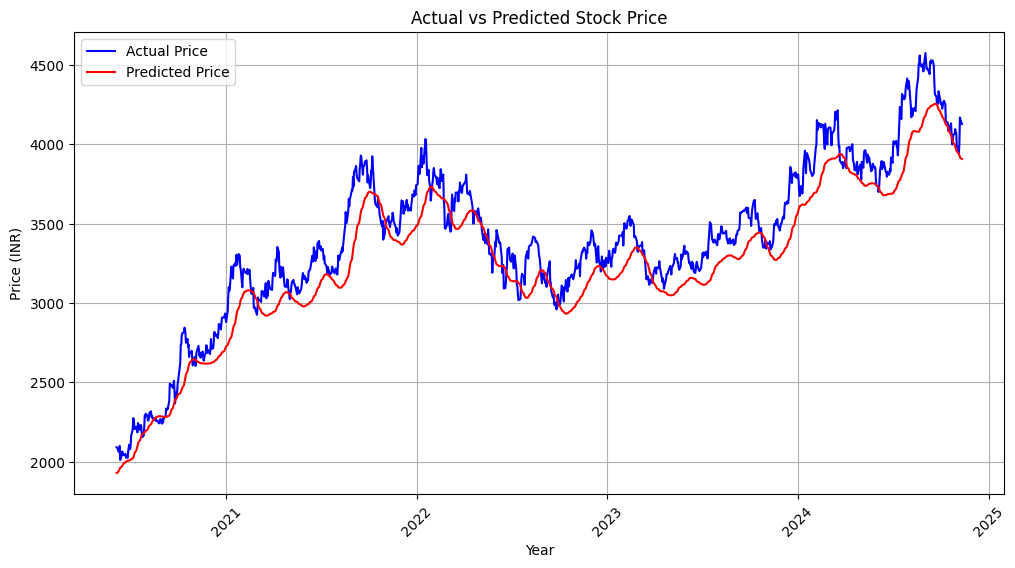

In [142]:
# Assuming y_test and y_pred are your actual and predicted price series
plt.figure(figsize=(12, 6))

# Use the full test data index for the x-axis (Date index) corresponding to the actual and predicted prices
plt.plot(test.index, y_test, 'b', label="Actual Price")  # Use the entire test.index
plt.plot(test.index, y_pred, 'r', label="Predicted Price")  # Use the entire test.index

# Label and title
plt.xlabel('Year')
plt.ylabel('Price (INR)')
plt.title('Actual vs Predicted Stock Price')
plt.legend()
plt.grid(True)

# Format the x-axis to display years only and set the locator to show only the start of each year
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Locator for each year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Formatter to display only the year

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()


In [132]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print(f"Mean Absolute Error on test set: {mae_percentage:.2f}%")

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


Mean Absolute Error on test set: 4.52%
Root Mean Squared Error (RMSE): 186.22
R² Score: 0.87


c:\Users\harsh\anaconda3\envs\stock_prediction_env\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [133]:
from sklearn.metrics import r2_score

# Calculate the R² score directly
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: 0.87


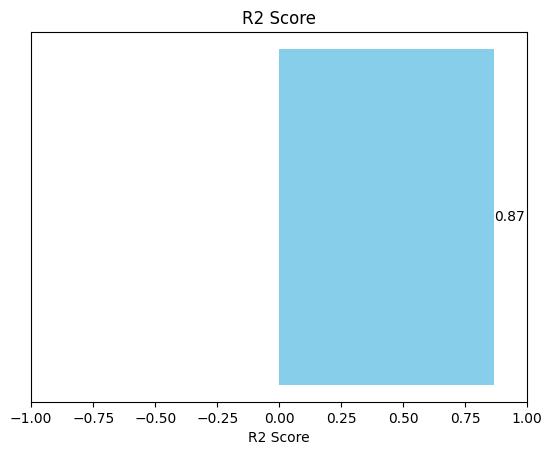

In [134]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')
plt.show()

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

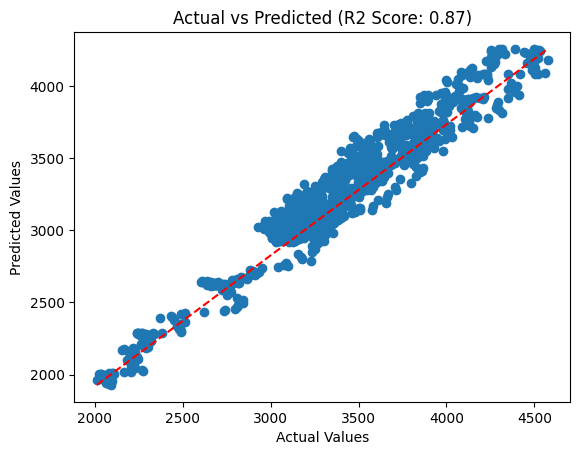

In [135]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted (R2 Score: {r2:.2f})')
plt.show()